Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Uploading Data

In [68]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [69]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.shape

(5110, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [72]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [73]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [74]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The histogram shows that majorily the crowd falls in the range of 40-60 years


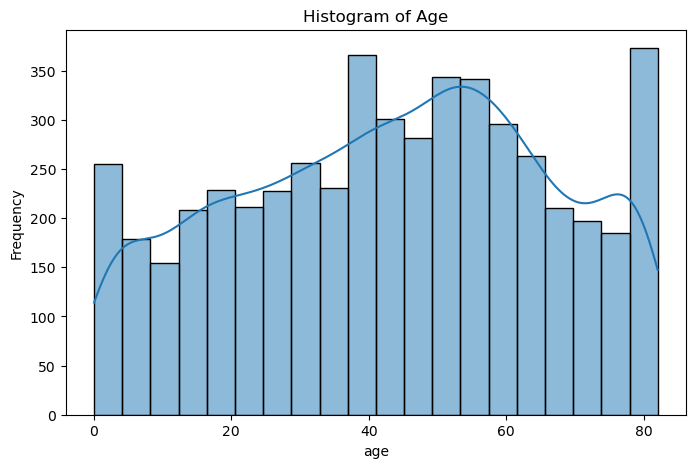

In [76]:
print('The histogram shows that majorily the crowd falls in the range of 40-60 years.')
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

The graph shows that majorily the crowd has average glucose level in the range of 50-100.


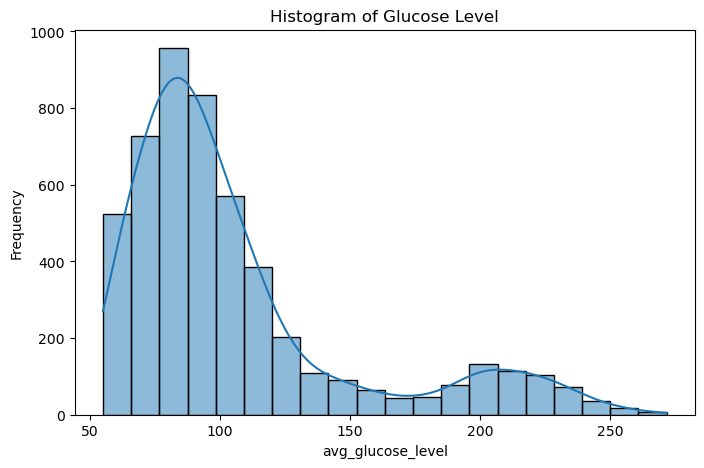

In [77]:
print('The graph shows that majorily the crowd has average glucose level in the range of 50-100.')
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_glucose_level'], bins=20, kde=True)
plt.title('Histogram of Glucose Level')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()

The graph shows that majority of the crowd has BMI in the range of 25-35.


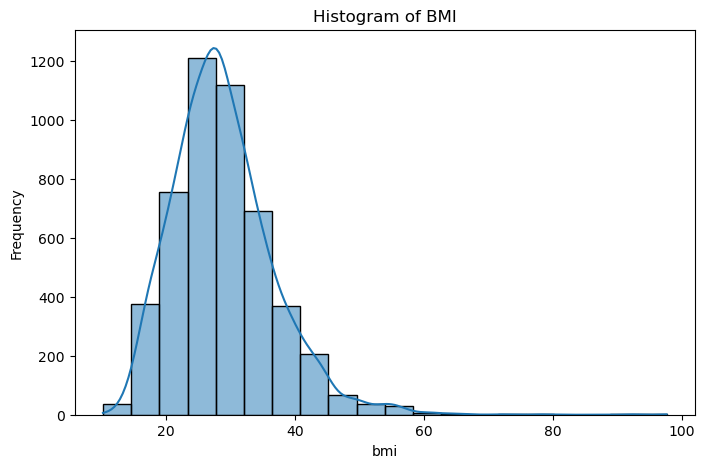

In [78]:
print('The graph shows that majority of the crowd has BMI in the range of 25-35.')
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

The graph shows that majority of the crowd are employeed in Private sector.


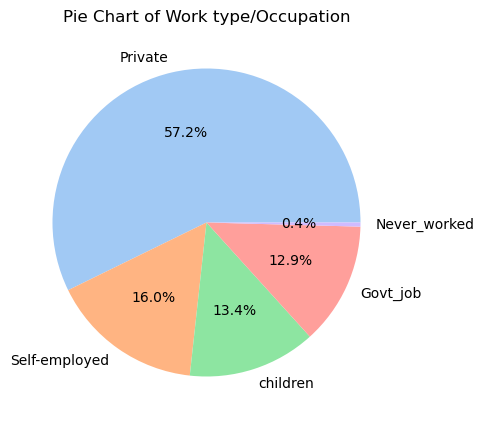

In [82]:
print('The graph shows that majority of the crowd are employeed in Private sector.')
plt.figure(figsize=(8, 5))
df['work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Work type/Occupation')
plt.ylabel('')
plt.show()

The graph shows that majority of the crowd have never smoked (37%).


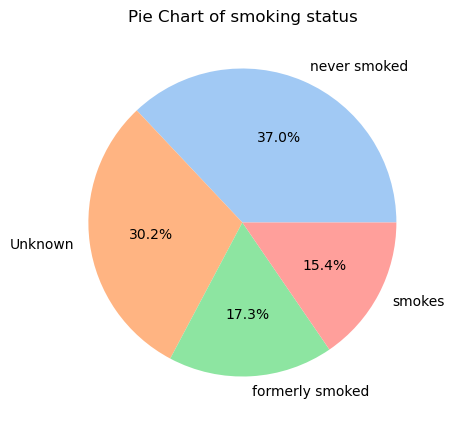

In [83]:
print('The graph shows that majority of the crowd have never smoked (37%).')
plt.figure(figsize=(8, 5))
df['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of smoking status')
plt.ylabel('')
plt.show()

The graph shows that spread of people residence across Urban and Rural areas.


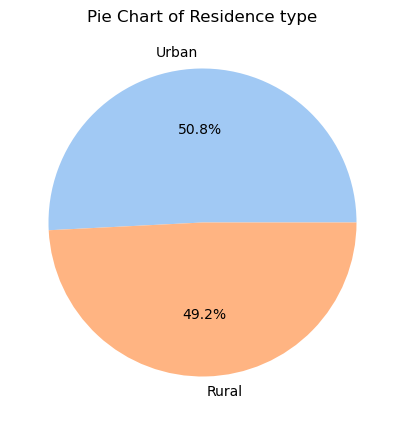

In [84]:
print('The graph shows that spread of people residence across Urban and Rural areas.')
plt.figure(figsize=(8, 5))
df['Residence_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Residence type')
plt.ylabel('')
plt.show()

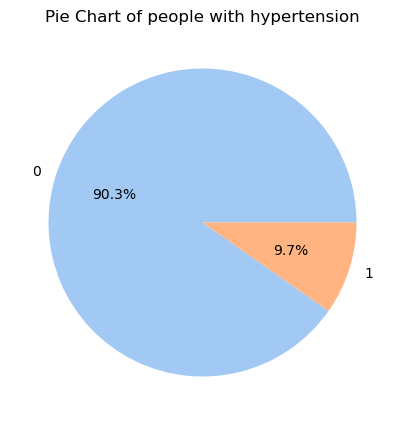

In [85]:
plt.figure(figsize=(8, 5))
df['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of people with hypertension')
plt.ylabel('')
plt.show()

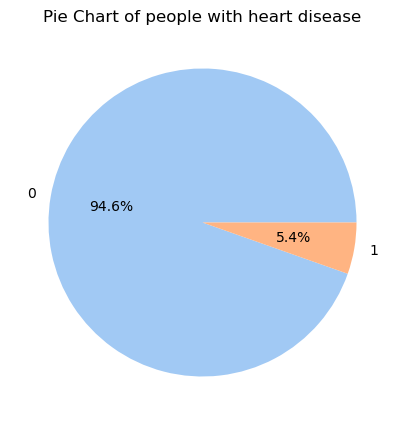

In [17]:
plt.figure(figsize=(8, 5))
df['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of people with heart disease')
plt.ylabel('')
plt.show()

Finding Outliers and treating them

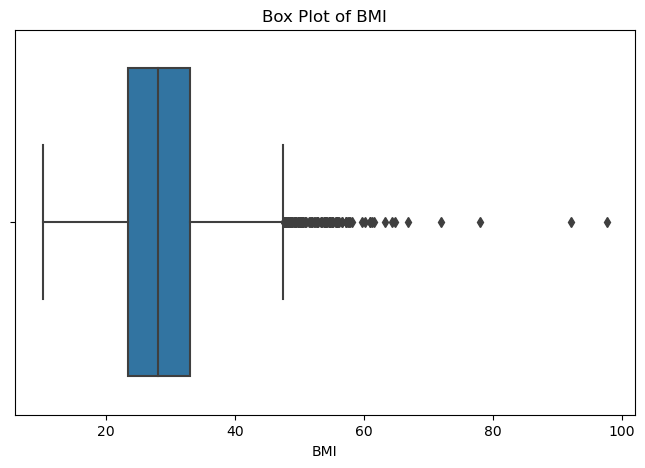

In [86]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

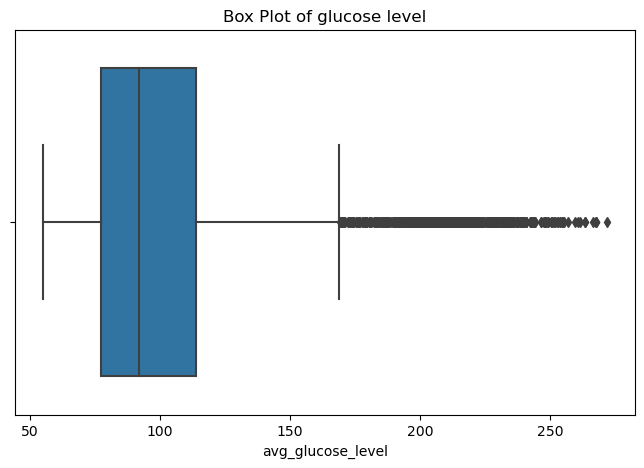

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of glucose level')
plt.xlabel('avg_glucose_level')
plt.show()

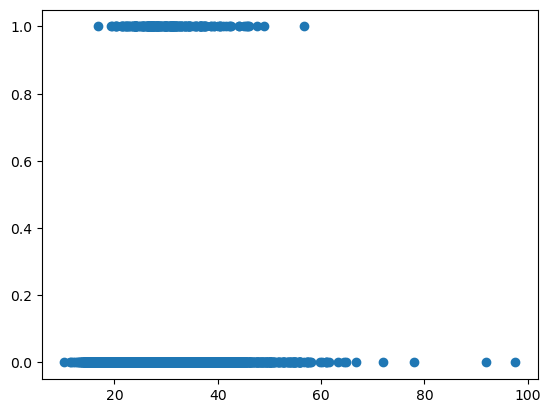

In [20]:
plt.scatter(x='bmi', y='stroke', data=df)

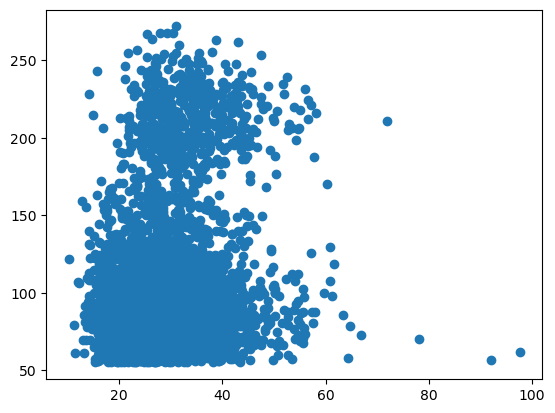

In [21]:
plt.scatter(x='bmi', y='avg_glucose_level', data=df)

The plot shows the spread of BMI vs Glusose level at specific areas like urban and rural


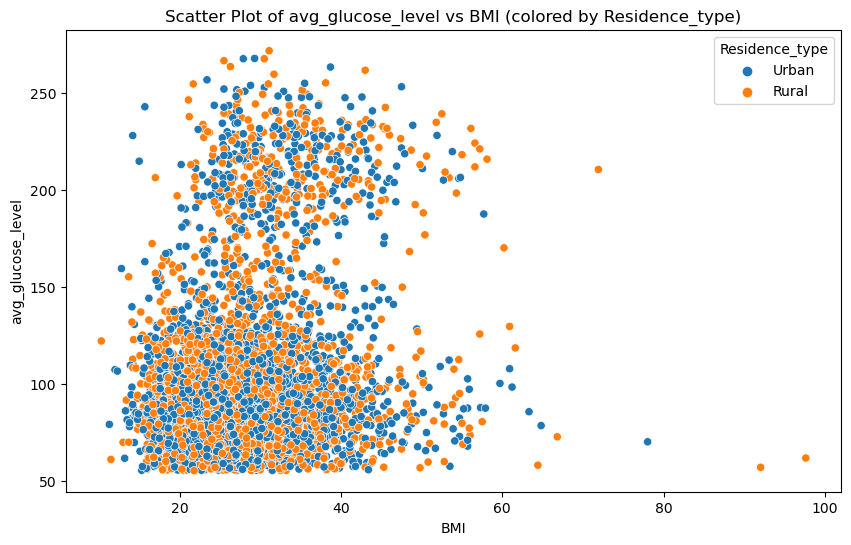

In [88]:
print('The plot shows the spread of BMI vs Glusose level at specific areas like urban and rural')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='Residence_type', data=df)
plt.title('Scatter Plot of avg_glucose_level vs BMI (colored by Residence_type)')
plt.xlabel('BMI')
plt.ylabel('avg_glucose_level')
plt.legend(title='Residence_type')
plt.show()

The plot shows the spread of BMI vs Glusose level at specific gender basis like male and female


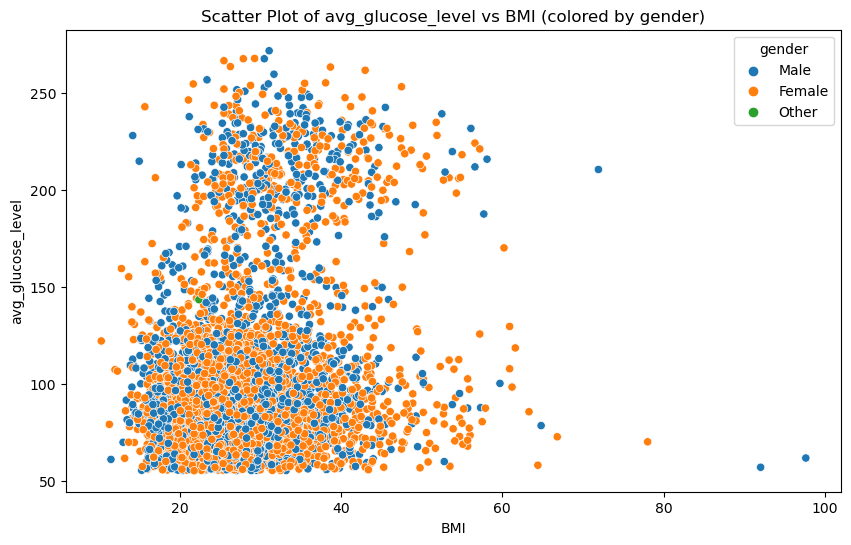

In [90]:
print('The plot shows the spread of BMI vs Glusose level at specific gender basis like male and female')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='gender', data=df)
plt.title('Scatter Plot of avg_glucose_level vs BMI (colored by gender)')
plt.xlabel('BMI')
plt.ylabel('avg_glucose_level')
plt.legend(title='gender')
plt.show()

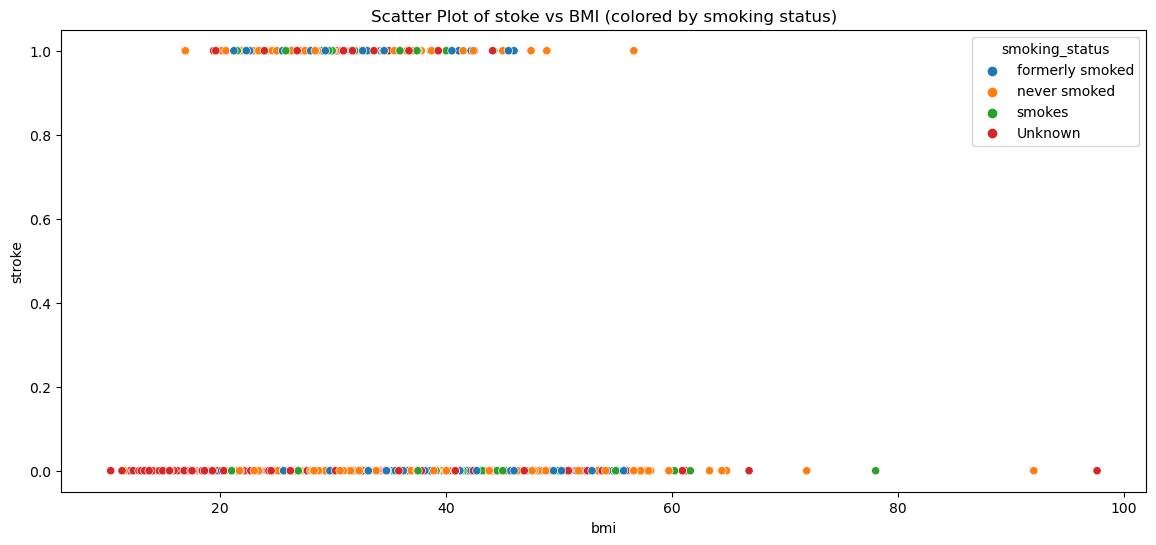

In [24]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='bmi', y='stroke', hue='smoking_status', data=df)
plt.title('Scatter Plot of stoke vs BMI (colored by smoking status)')
plt.xlabel('bmi')
plt.ylabel('stroke')
plt.legend(title='smoking_status')
plt.show()

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df = df.drop('id', axis=1)

In [28]:
df.shape

(5110, 11)

In [29]:
df = df.dropna()

In [30]:
df.shape

(4909, 11)

In [31]:
df_num = df.select_dtypes(include='number')
df_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


In [32]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
df = df[~((df_num > upper_bound)).any(axis=1)]

In [34]:
df_num = df.select_dtypes('number')
df_num.shape

(3755, 6)

In [35]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [36]:
df = df[~((df_num > upper_bound)).any(axis=1)]

In [37]:
df.shape

(3638, 11)

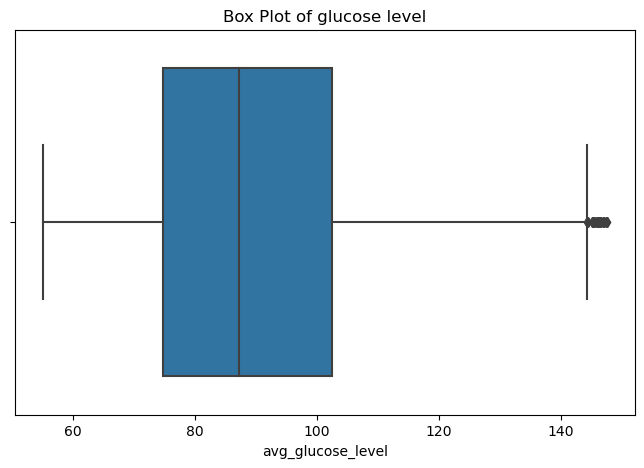

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of glucose level')
plt.xlabel('avg_glucose_level')
plt.show()

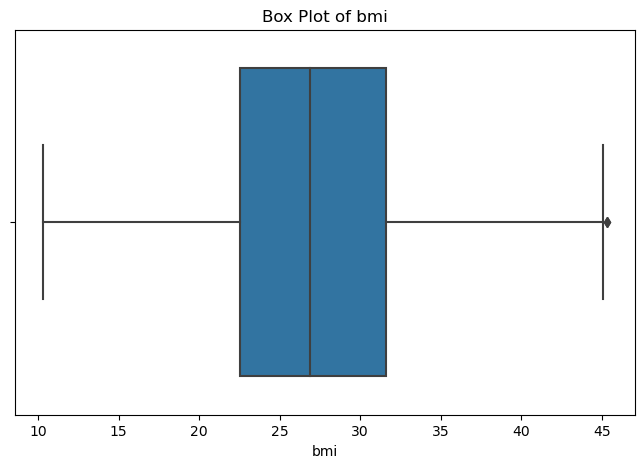

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of bmi')
plt.xlabel('bmi')
plt.show()

In [40]:
df_num = df.select_dtypes(include='number')
df_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
249,3.0,0,0,95.12,18.0,0
251,8.0,0,0,110.89,17.6,0
252,70.0,0,0,69.04,35.9,0
255,52.0,0,0,77.59,17.7,0
257,32.0,0,0,77.67,32.3,0


In [41]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [42]:
df = df[~((df_num > upper_bound)).any(axis=1)]

In [43]:
df.shape

(3610, 11)

In [44]:
df_num = df.select_dtypes(include='number')
df_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
249,3.0,0,0,95.12,18.0,0
251,8.0,0,0,110.89,17.6,0
252,70.0,0,0,69.04,35.9,0
255,52.0,0,0,77.59,17.7,0
257,32.0,0,0,77.67,32.3,0


In [45]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
df = df[~((df_num > upper_bound)).any(axis=1)]

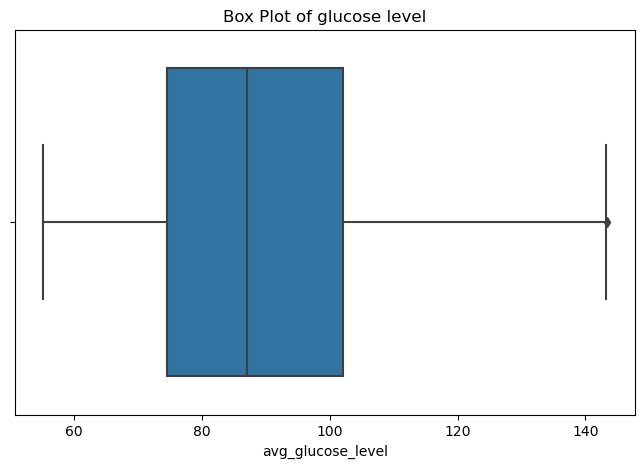

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of glucose level')
plt.xlabel('avg_glucose_level')
plt.show()

In [48]:
df_num = df.select_dtypes(include='number')
df_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
249,3.0,0,0,95.12,18.0,0
251,8.0,0,0,110.89,17.6,0
252,70.0,0,0,69.04,35.9,0
255,52.0,0,0,77.59,17.7,0
257,32.0,0,0,77.67,32.3,0


In [49]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [50]:
df = df[~((df_num > upper_bound)).any(axis=1)]

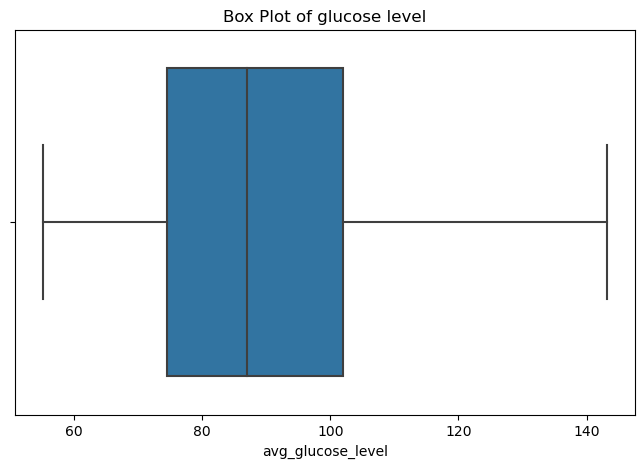

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of glucose level')
plt.xlabel('avg_glucose_level')
plt.show()

In [52]:
X = df.drop('stroke', axis=1)
y = df.stroke
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
255,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked
257,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes


In [53]:
X_num = X.select_dtypes('number')
X_num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
249,3.0,0,0,95.12,18.0
251,8.0,0,0,110.89,17.6
252,70.0,0,0,69.04,35.9
255,52.0,0,0,77.59,17.7
257,32.0,0,0,77.67,32.3


In [54]:
X_cat = X.select_dtypes('object')
X_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
249,Male,No,children,Rural,Unknown
251,Female,No,Private,Urban,Unknown
252,Female,Yes,Private,Rural,formerly smoked
255,Female,Yes,Private,Urban,formerly smoked
257,Female,Yes,Private,Rural,smokes


In [55]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [56]:
type(X_num_scaled)

numpy.ndarray

In [57]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [58]:
X_num_scaled.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3601.000000,3601.0,3601.0,3601.000000,3601.000000
mean,0.456561,0.0,0.0,0.387242,0.489235
std,0.263706,0.0,0.0,0.222759,0.190201
min,0.000000,0.0,0.0,0.000000,0.000000
25%,0.243164,0.0,0.0,0.220607,0.350575
50%,0.450684,0.0,0.0,0.361695,0.477011
75%,0.658203,0.0,0.0,0.533000,0.612069
max,1.000000,0.0,0.0,1.000000,1.000000


In [59]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [60]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [61]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((3601, 20), (3601, 5), (3601, 15))

In [62]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64
0
(3601, 20)
(3601,)


In [63]:
X.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,3601.000000,3601.0,3601.0,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,0.456561,0.0,0.0,0.387242,0.489235,0.605110,0.394890,0.417384,0.582616,0.121911,0.005554,0.565121,0.129964,0.177451,0.491252,0.508748,0.351014,0.147459,0.362122,0.139406
std,0.263706,0.0,0.0,0.222759,0.190201,0.488895,0.488895,0.493196,0.493196,0.327228,0.074328,0.495810,0.336310,0.382103,0.499993,0.499993,0.477353,0.354612,0.480680,0.346418
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243164,0.0,0.0,0.220607,0.350575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.450684,0.0,0.0,0.361695,0.477011,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.658203,0.0,0.0,0.533000,0.612069,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2880, 20)
(721, 20)
(2880,)
(721,)
